## Objetivo:
Analizar la relacion entre el precio actual de los productos y su nivel de popularidad, medido a través del recuento de calificaciones.

## ¿ Existe una relación entre el precio de un producto y su nivel de popularidad en términos de cantidad de calificaciones ?

¿ Los prodductos más baratos tienden a concentrar mayor volumen de reseñas ?

## 1. Carga de los datos

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/amazon_clean_v1.csv")
df.head()

,id_producto,nombre_producto,categoria,descuento_precio,precio_actual,porcentaje_descuento,calificacion,recuento_calificaciones,detalle_producto,id_usuario,nombre_usuario,id_de_revision,titulo_resenia,contenido_revision,link_imagen,link_producto,outlier_precio,diferencia_precio,tiene_descuento
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,False,700.0,True
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,False,150.0,True
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,False,1700.0,True
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,False,370.0,True
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,False,245.0,True


## 2. Selección de variables relevantes

In [35]:
cols = ["precio_actual", "recuento_calificaciones", "outlier_precio"]

df_b = df[cols].copy()

Se utiliza el precio actual como proxy de costo para el usuario y el recuento de calificaciones como proxy de popularidad

## 3. Validaciones especificas para este análisis

In [36]:
df_b[["precio_actual", "recuento_calificaciones"]].describe()

,precio_actual,recuento_calificaciones
count,1465.000000,1465.000000
mean,5444.990635,18277.634812
std,10874.826864,42727.398216
min,39.000000,2.000000
25%,800.000000,1191.000000
50%,1650.000000,5179.000000
75%,4295.000000,17325.000000
max,139900.000000,426973.000000


Se verifica que los precios sean positivos y que el recuento de calificaciones no contenga valores negativos ni nulos

### Consideración metodológica
El recuento de calificaciones suele presentar una distribución altamente asimétrica, con pocos productos muy populares y muchos con baja interacción.
Por este motivo, se analizan los datos considerando escalas y segmentaciones adecuadas.

## 4. Análisis exploratorio (EDA)

### 4.1 scatter basico (precio vs popularidad)

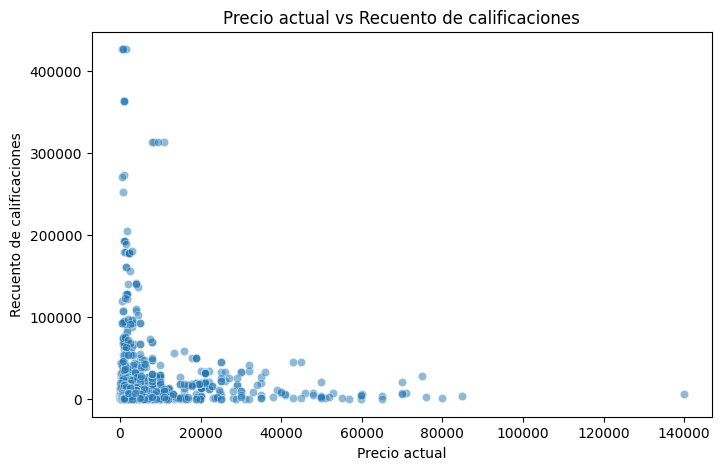

In [37]:
plt.figure(figsize=(8,5))
sns.scatterplot(data = df_b, x = 'precio_actual', y = 'recuento_calificaciones', alpha = 0.5)
plt.title('Precio actual vs Recuento de calificaciones')
plt.xlabel('Precio actual')
plt.ylabel('Recuento de calificaciones')

plt.show()

Se observa una fuerte concentración de productos con bajo recuento de calificaciones, independientemente del precio

### 4.2 Escala logaritmica

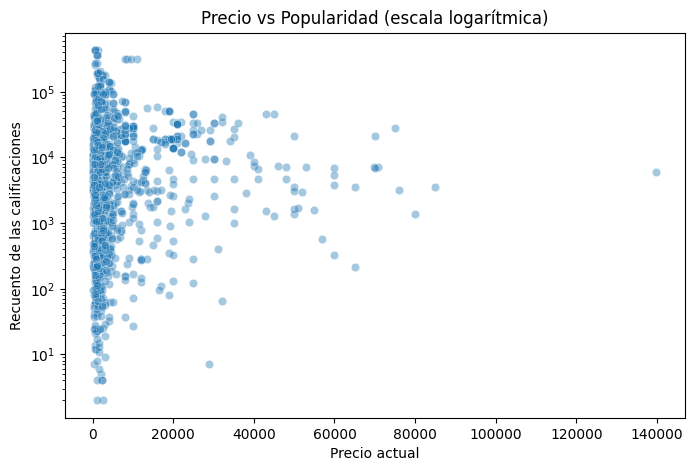

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data = df_b, x = 'precio_actual', y = 'recuento_calificaciones', alpha = 0.4)
plt.yscale('log')
plt.title('Precio vs Popularidad (escala logarítmica)')
plt.xlabel('Precio actual')
plt.ylabel('Recuento de las calificaciones')

plt.show()

## 5. Segmentación por rangos de precio

In [39]:
bins = [0, 50, 100, 300, df_b['precio_actual'].max()]
labels = ["Bajo", "Medio", "Alto", "Muy alto"]

df_b["segmento_precio"] = pd.cut(df["precio_actual"], bins = bins, labels = labels)

In [40]:
df_b.groupby("segmento_precio")["recuento_calificaciones"].median()

/tmp/ipykernel_10981/3604555232.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_b.groupby("segmento_precio")["recuento_calificaciones"].median()


segmento_precio
Bajo        5792.0
Medio       3095.0
Alto        6268.0
Muy alto    5179.0
Name: recuento_calificaciones, dtype: float64

## 6. Sensibilidad a outliers de precio

In [ ]:
df_sin_outliers = df_b[~df_b['outlier_precio']]
df_sin_outliers.groupby('segmento_precio')['recuento_calificaciones'].median()

/tmp/ipykernel_10981/4177102526.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sin_outliers.groupby('segmento_precio')['recuento_calificaciones'].median()


segmento_precio
Bajo        5792.0
Medio       3095.0
Alto        6268.0
Muy alto    4813.5
Name: recuento_calificaciones, dtype: float64

## 7. Correlación

In [ ]:
df_b[["precio_actual", "recuento_calificaciones"]].corr()